In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
def ksdensity(data, width=0.3):
    """Returns kernel smoothing function from data points in data"""
    def ksd(x_axis):
        def n_pdf(x, mu=0., sigma=1.): # normal pdf
            u = (x - mu) / abs(sigma)
            y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
            y *= np.exp(-u * u / 2)
            return y
        prob = [n_pdf(x_i, data, width) for x_i in x_axis]
        pdf = [np.average(pr) for pr in prob] # each row is one x value
        return np.array(pdf)
    return ksd
    


## Q1

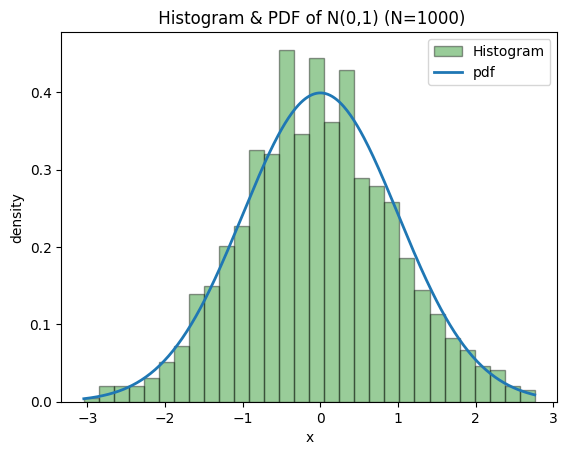

In [2]:
np.random.seed(0)  # To make this more repeatable
N = 1000
x_norm = np.random.randn(N)
ksd_norm = ksdensity(x_norm, width=0.3)

counts, bins, patches = plt.hist(x_norm, bins=30, density=True, edgecolor='black', color="green", alpha=0.4, label="Histogram")

# For scaling in next cell
bin_width = bins[1] - bins[0]
x = np.linspace(bins[0], bins[-1], 400)

pdf_true = norm.pdf(x, 0, 1)
plt.plot(x, pdf_true, linewidth=2, label='pdf')

plt.title(' Histogram & PDF of N(0,1) (N=1000)')
plt.legend()
plt.xlabel('x')
plt.ylabel('density')
plt.savefig("Q1_gaussian_histogram+pdf.png", dpi=300, bbox_inches='tight')
plt.show()

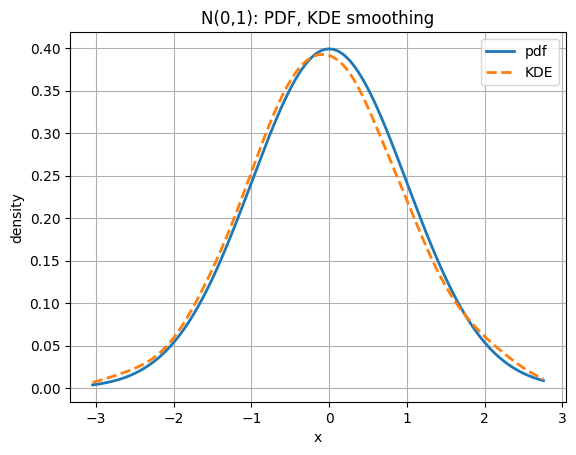

In [3]:
# Scalesd pdfs with count 
pdf_true = norm.pdf(x, 0, 1)
plt.plot(x, pdf_true, linewidth=2, label='pdf')

# Scaled pdfs with count
norm_pdf_kde = ksd_norm(x)
plt.plot(x, norm_pdf_kde, linestyle='--', linewidth=2, label='KDE')
plt.title('N(0,1): PDF, KDE smoothing')
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.grid()
plt.savefig("Q1_gaussian_KDE+pdf.png", dpi=300, bbox_inches='tight')
plt.show()

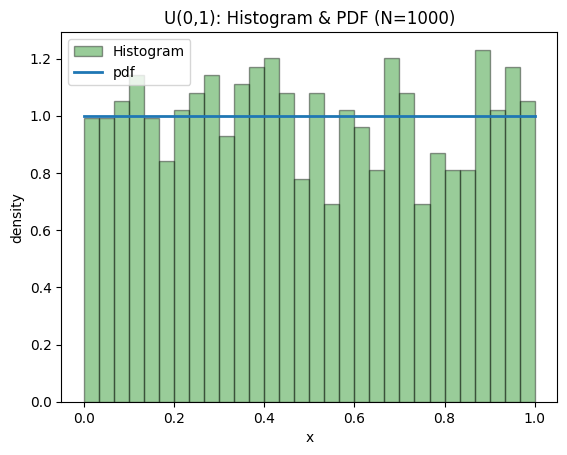

In [4]:
np.random.seed(0)  # To make this more repeatable
N = 1000
x_uni = np.random.rand(N)

ksd_uni= ksdensity(x_uni, width=0.05)

counts, bins, patches = plt.hist(x_uni, bins=30, density=True, edgecolor='black', color="green", alpha=0.4, label="Histogram")

# For scaling in next cell
bin_width = bins[1] - bins[0]
x = np.linspace(0, 1, 400)

# scaled pdf
pdf = np.ones_like(x)
plt.plot(x, pdf, linewidth=2, label='pdf')

plt.legend()
plt.title('U(0,1): Histogram & PDF (N=1000)')
plt.xlabel('x')
plt.ylabel('density')
# plt.savefig("Q1_uniform_histogram+pdf.png", dpi=300, bbox_inches='tight')
plt.show()

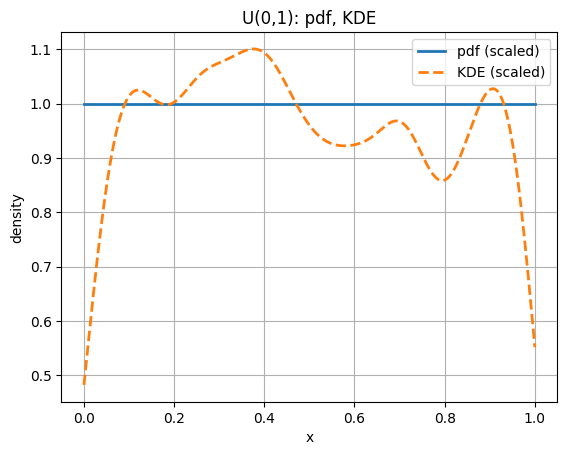

In [5]:
# scaled pdf
pdf = np.ones_like(x)
plt.plot(x, pdf, linewidth=2, label='pdf (scaled)')

# Scaled kde with count
uni_pdf_kde = ksd_uni(x)
plt.plot(x, uni_pdf_kde, linestyle='--', linewidth=2, label='KDE (scaled)')

plt.title('U(0,1): pdf, KDE')
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.grid()
plt.savefig("Q1_uniform_KDE+pdf.png", dpi=300, bbox_inches='tight')
plt.show()

#### Comment on the advantages and disadvantages of the kernel density method compared with the histogram method for estimation  of  a probability  density from random samples
For kernel density the advantages are:
- It is smoother so easier to visualise
- It is continuous so can integrate to approximate specific probabilities
- Not sensitive to the changes to binning like a histogram

But the disadvantages are:
- The width choice for the kernel are very important and changes the shape of the graph as seen in the uniform probability
- There is area outside the defined range.
- It sometimes picks up the noise of the signal as can be seen in the Uniform distribution where it picked up the noise of the random sample (look at the dips compared to the histogram)
- More computation.


For a histogram the advantages are:
- Its simple
- Doesn't try and interpolate from noise like the kernel desnity function does.

The disadvantages are:
- The number of bins seems to effect the histogram plot quite a lot.
- Harder for visualisation of the data.
- The number for the seed seems to effect it noticeably.

For the Normal distribution the kernel desnity function is better while for the uniform distribution the histogram seems to be better.

#### Theoretical mean and standard deviation calculation for uniform density as a function of N:

To find the mean and variance for the uniform let $X_i$ represent the count in bin $i$. Let the random variable $C_{i,t} \sim \text{Bernoulli}(p_i)$ representing each trial $t$ and if it is in bin $i$. All the samples are independent.

$$C_{i,t} = \begin{cases}
    1, \quad\text{if trial $t$ in bin $i$} \\
    0, \quad\text{otherwise}
\end{cases}$$

$$\mathbb{E}[X_i] = \mathbb{E}\left[\sum_{t=1}^N C_{i,t}\right] = \sum_{t=1}^N \mathbb{E}[C_{i,t}] = Np_i$$

$$\text{Var}[X_i] = \text{Var}\left[\sum_{t=1}^N C_{i,t}\right] = \sum_{t=1}^N\text{Var}[C_{i,t}] = Np_i(1-p_i)$$
\begin{equation}
    \sigma_i = \sqrt{Np_i(1-p_i)} \label{std:uniform}
\end{equation}


$$\text{SNR } = \frac{Np_i}{\sqrt{Np_i(1-p_i)}}$$



#### Explain behaviour as N becomes larger

For the uniform distribution the mean stays the same and the standard deviation approaches 0. Visually speaking the histogram will look more flat and more like the pdf.

For a Normal Distribution the curve will look smoother and closer to the pdf as the sampling noise becomes less significant. The standard error of the sample mean would go to zero but the standard deviation will stay the same.


N = 100
  Empirical mean count per bin: 3.333
  Theoretical mean count per bin: 3.333
  Empirical sd of counts: 1.445
  Theoretical sd of counts: 1.795
N = 1000
  Empirical mean count per bin: 33.333
  Theoretical mean count per bin: 33.333
  Empirical sd of counts: 5.153
  Theoretical sd of counts: 5.676
N = 10000
  Empirical mean count per bin: 333.333
  Theoretical mean count per bin: 333.333
  Empirical sd of counts: 17.878
  Theoretical sd of counts: 17.951


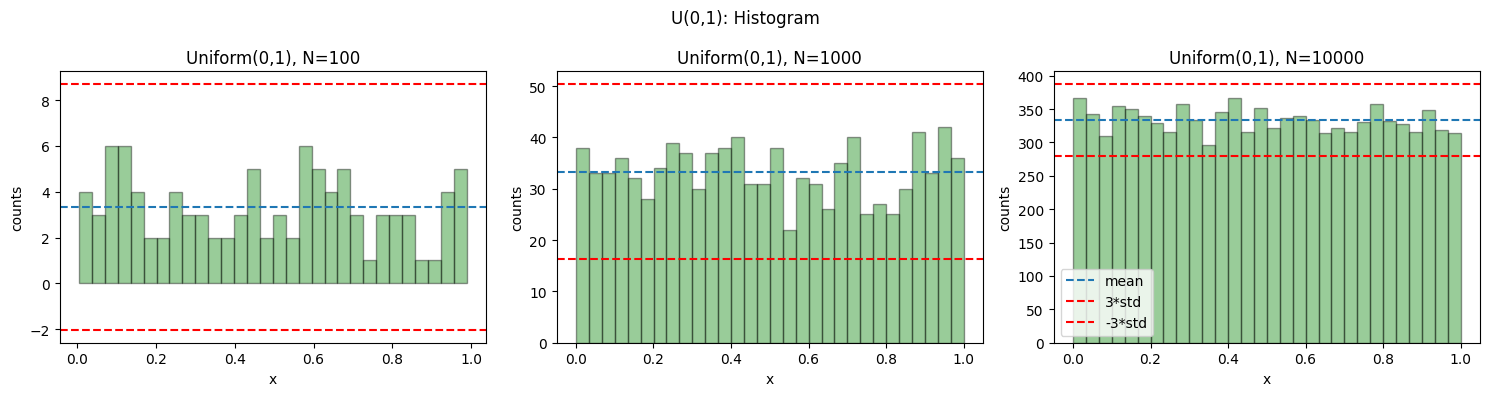

In [6]:
np.random.seed(0)  # To make this more repeatable
N = [100, 1000, 10000]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, n in zip(axes, N):
    x_uni = np.random.rand(n)
    counts, bin_edges, _ =  ax.hist(x_uni, bins=30, density=False, edgecolor='black', color="green", alpha=0.4)
    p = 1/30
    mean = n*p
    std = (n*p*(1-p))**0.5

    mean_theory = n * p
    sd_theory = np.sqrt(n * p * (1 - p))

    # Empirical mean & sd from observed counts
    mean_emp = counts.mean()
    sd_emp = counts.std(ddof=0)  

    print(f"N = {n}")
    print(f"  Empirical mean count per bin: {mean_emp:.3f}")
    print(f"  Theoretical mean count per bin: {mean_theory:.3f}")
    print(f"  Empirical sd of counts: {sd_emp:.3f}")
    print(f"  Theoretical sd of counts: {sd_theory:.3f}")
    
    ax.set_title(f'Uniform(0,1), N={n}')
    
    ax.axhline(mean, linestyle="--",label="mean")
    ax.axhline(3*std + mean, linestyle="--",label="3*std", color="red" )
    ax.axhline(-3*std + mean, linestyle="--",label="-3*std", color="red" )
    
    ax.set_xlabel('x')
    ax.set_ylabel('counts')

fig.suptitle('U(0,1): Histogram')
plt.legend()
plt.tight_layout()
# plt.savefig("Q1_histograms_different_N", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\shsiv\AppData\Local\Temp\ipykernel_15540\1624246787.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


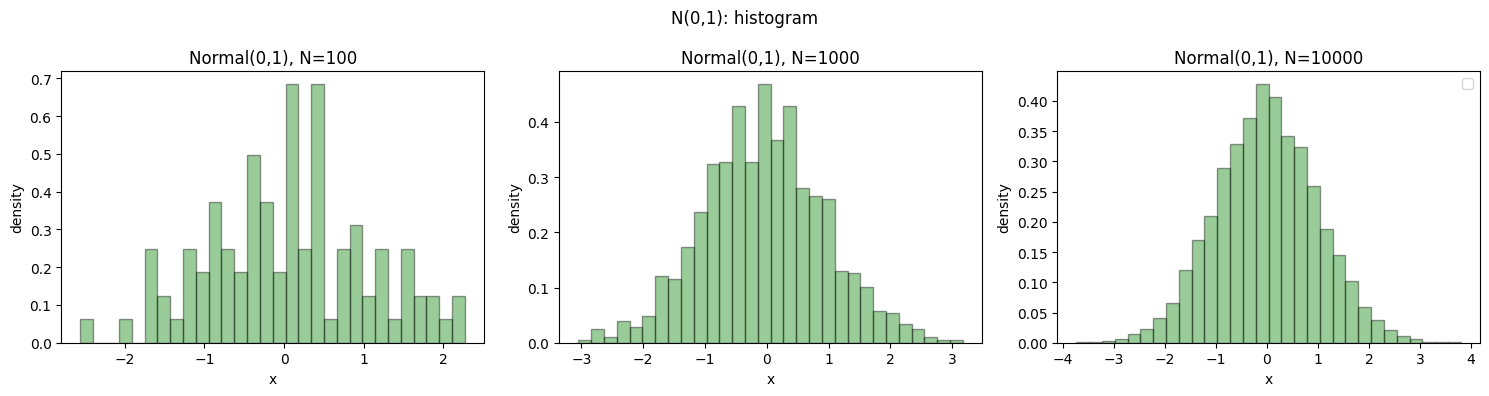

In [7]:
np.random.seed(0)  # To make this more repeatable
Ns = [100, 1000, 10000]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, n in zip(axes, Ns):
    x_uni = np.random.randn(n)
    mu = np.mean(x_uni)
    sigma = np.std(x_uni)
    counts, bin_edges, _  = ax.hist(x_uni, bins=30, density=True, edgecolor='black', color="green", alpha=0.4)

    

    ax.set_title(f'Normal(0,1), N={n}')
    ax.set_xlabel('x')
    ax.set_ylabel('density')

fig.suptitle('N(0,1): histogram')
plt.legend()
plt.tight_layout()
plt.show()

####  Are your histogram results consistent with the multinomial distribution theory? 

Yes as the bar heights for the bins converge to their true probability.

## Q2

#### For normally distributed ${\cal N}(x|0,1)$ random variables, take $y=f(x)=ax+b$. Calculate $p(y)$ using the Jacobian formula:
$$\left|\frac{dx}{dy}\right|=\left|\frac1{a}\right|$$

$$f^{-1}(x) = \frac{x-b}{a} \text{ (Like a z-score)}$$

$$\therefore p_Y(y) = p_X\left(\frac{y-b}{a}\right) \frac{1}{a} = {\frac{1}{a{\sqrt{2\pi}}}}\exp\left(-{\frac{1}{2}}\left[{\frac{y-b}{a}}\right]^{2}\right) $$

#### Explain how this is linked to the general normal density with non-zero mean and non-unity variance:

The function $f^{-1}$ acts like z-score do (same exact formula). As b shifts the mean $\mu$ by b and a increases the standard deviation $\sigma$ by a ( $Y \sim N(b,a^2)$). 
This means that any general normal distribution can be represented by $y = \sigma x + \mu$ ($a= \sigma, b = \mu$, to show the relation with general normal distribution)

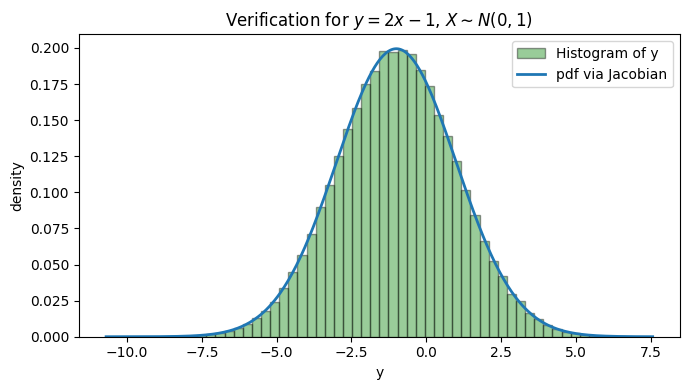

In [8]:
np.random.seed(0)
N = 200000
x = np.random.randn(N)

a = 2
b = -1
y = a * x + b

# Histogram 
fig, ax = plt.subplots(figsize=(7,4))
counts, bins, _ = ax.hist(y, bins=60, density=True, alpha=0.4, edgecolor='black', label='Histogram of y', color='green')

# pdf from jacobian formula:
ys = np.linspace(y.min(), y.max(), 400)
py = (1/np.abs(a)) * (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * ((ys - b)/a)**2)

ax.plot(ys, py, linewidth=2, label='pdf via Jacobian')

ax.set_title(rf'Verification for $y = {a}x {b}$, $X\sim N(0,1)$')
ax.set_xlabel('y')
ax.set_ylabel('density')
ax.legend()
plt.tight_layout()
plt.savefig("Q2_histograms_y=2x-1_Gaussian", dpi=300, bbox_inches='tight')
plt.show()

#### Now take $p(x)={\cal N}(x|0,1)$ and $f(x)=x^2$. Calculate $p(y)$ using the Jacobian formula:

$$p(y)=\sum_{k=1}^{K}{\frac{p(x)}{|d y/d x|}}{\bigg|}_{x=x_{k}(y)} 
= p(\sqrt{y}) \frac{1}{s\sqrt{y}} + p(\sqrt{-y}) \frac{1}{s\sqrt{y}} 
= \begin{cases}
       {\frac{1}{\sqrt{2\pi y}}}\,e^{-y/2} &\quad\ y\ge 0\\
       0 &\quad\ y\lt 0 \\ 
     \end{cases}$$


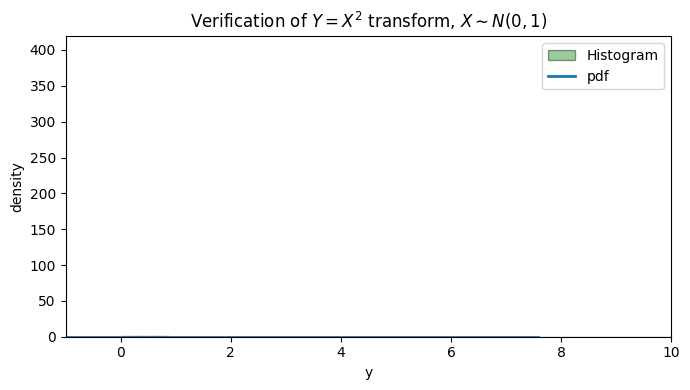

In [9]:
np.random.seed(0)
N = 200000
x = np.random.randn(N)

y = x**2

# Histogram of Y 
fig, ax = plt.subplots(figsize=(7,4))
counts, bins, _ = ax.hist(y, bins=80, density=True, alpha=0.4, edgecolor='black', label='Histogram', color="green")

# pdf of Y
y = np.linspace(1e-6, y.max(), 400)
py = (1/np.sqrt(2*np.pi*y)) * np.exp(-y/2)

ax.plot(ys, py, linewidth=2, label='pdf')
# ax.set_xlim(0, np.percentile(y, 99.5))
ax.set_xlim(-1, 10)
ax.set_xlabel('y')
ax.set_ylabel('density')
ax.set_title(r'Verification of $Y = X^2$ transform, $X \sim N(0,1)$')
ax.legend()
plt.tight_layout()
plt.savefig("Q2_histograms_y=x^2_transform", dpi=300, bbox_inches='tight')
plt.show()

## Q3

#### Calculate the CDF and the inverse CDF for the exponential distribution:

$$F_Y(y) = \int_0^y e^{-y} dy  = 1 - e^{-y}$$

$$F^{-1}(y) = -\ln{\left(1-y\right)}$$

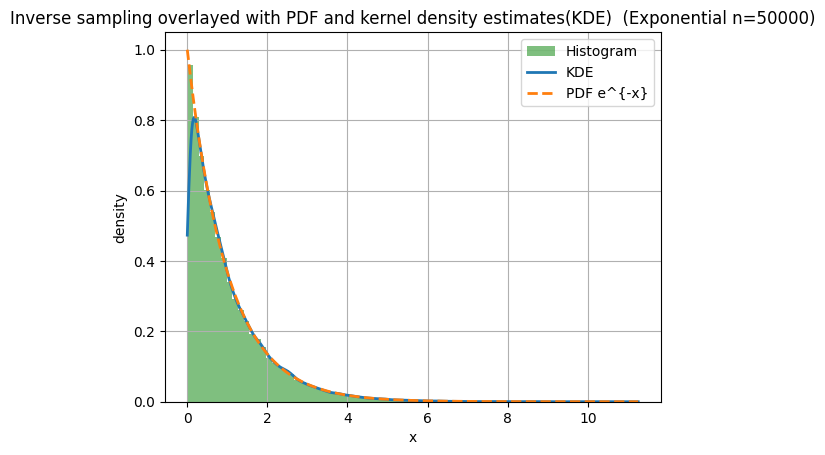

In [10]:
np.random.seed(0)         
N = 50000
width = 0.1

# inverse cdf sampling 
U = np.random.rand(N)
X = -np.log(1 - U) # inverse cdf

x = np.linspace(0, max(X)*1.05, 600)
pdf = np.exp(-1*x)

kde_fn = ksdensity(X, width=width)
kde_vals = kde_fn(x)

# Tha plot
plt.figure()
plt.hist(X, bins=80, range=(0, x.max()), density=True, alpha=0.5, label="Histogram", color="green")
plt.plot(x, kde_vals, linewidth=2, label="KDE")
plt.plot(x, pdf, linewidth=2, linestyle="--", label="PDF e^{-x}")
plt.title(f"Inverse sampling overlayed with PDF and kernel density estimates(KDE)  (Exponential n={N})")
plt.xlabel("x")
plt.ylabel("density")
plt.grid(True)
# plt.savefig("Q3_histogram_KDE_PDF_Exponential_dist.png", dpi=300, bbox_inches='tight')
plt.legend()
plt.show()

## Q4

In [11]:
np.random.seed(0)
N = 100000
alpha = 0.5
beta = 1
# (a)
def constants(alpha, beta):
    b = (1/alpha) * np.arctan(beta * np.tan(np.pi*alpha/2))
    s = (1 + (beta**2) * (np.tan(np.pi*alpha/2)**2))**(1/(2*alpha))
    return b, s

# (b)
def generate_U(n):
    return np.random.uniform(-np.pi/2, np.pi/2, size=n)

# (c)
def generate_V(n):
    x = np.random.rand(n)
    return -np.log(1 - x)
# (d)
def generate_X(n, beta, alpha):
    b, s = constants(alpha, beta)
    U = generate_U(n)
    V = generate_V(n)
    numer = np.sin(alpha * (U + b))
    denom = (np.cos(U))**(1/alpha)
    frac  = numer / denom
    inner = np.cos(U - alpha*(U + b)) / V
    power = (1 - alpha) / alpha
    return s * frac * (inner**power)


In [12]:
def make_bins_from_centers(centers):
    step = np.diff(centers).mean()
    edges = np.concatenate(([centers[0]-step/2], centers[:-1] + step/2, [centers[-1]+step/2]))
    return edges

def compute_edges(values, num_centers=181, pct_range=(0.5, 99.5)):
    lo, hi = np.percentile(values, pct_range)
    m = max(abs(lo), abs(hi))
    lo, hi = -m, m
    centers = np.linspace(lo, hi, num_centers)
    centers -= centers[np.argmin(abs(centers))]
    return make_bins_from_centers(centers)


alphas = [0.5, 1.5]
betas  = [-1, -0.5, 0.0, 0.5, 1]

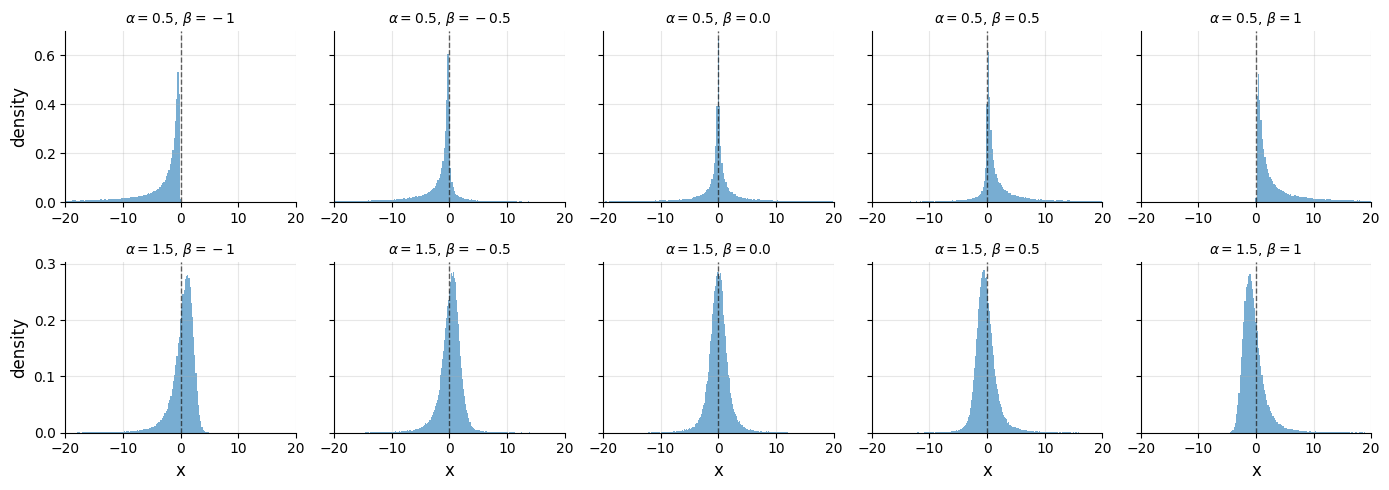

In [ ]:
def compute_edges(values, num_centers=181,
                  pct_range=(0.5, 99.5),
                  clip=None):
    lo, hi = np.percentile(values, pct_range)
    m = max(abs(lo), abs(hi))
    if clip is not None:
        m = min(m, clip)     
    lo, hi = -m, m
    centers = np.linspace(lo, hi, num_centers)
    centers -= centers[np.argmin(abs(centers))]
    return make_bins_from_centers(centers)

fig, axes = plt.subplots(
    nrows=len(alphas),
    ncols=len(betas),
    figsize=(14, 5),
    sharex='row',
    sharey='row'
)

x_clip = 20  

for i, a in enumerate(alphas):
    for j, b in enumerate(betas):
        ax = axes[i, j]

        X = generate_X(N, beta=b, alpha=a)

        # build bins clipped to [-x_clip, x_clip]
        edges = compute_edges(X, pct_range=(0.5, 99.5), clip=x_clip)

        # also discard extreme samples
        X_plot = X[(X >= -x_clip) & (X <= x_clip)]

        ax.hist(X_plot, bins=edges, density=True, alpha=0.6)
        ax.axvline(0, color='k', linewidth=1, linestyle='--', alpha=0.6)
        ax.set_xlim(-x_clip, x_clip)

        ax.set_title(rf"$\alpha={a},\, \beta={b}$", fontsize=10)

        if i == len(alphas) - 1:
            ax.set_xlabel("x")
        if j == 0:
            ax.set_ylabel("density")
plt.savefig("Q4_histograms_dists.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

#### Hence comment on the interpretation of the parameters $\alpha$ and $\beta$.

$\alpha$ makes it look more concentrated while $\beta$ shifts the plot.

In [ ]:
import pandas as pd
def sample_stats(x):
    x = np.asarray(x)
    mean = np.mean(x)
    median = np.median(x)

    centered = x - mean
    m2 = np.mean(centered**2)
    m3 = np.mean(centered**3)
    m4 = np.mean(centered**4)

    std = np.sqrt(m2)
    skew = m3 / (std**3) if std > 0 else np.nan
    excess_kurt = m4 / (std**4) - 3 if std > 0 else np.nan

    q05, q25, q75, q95 = np.percentile(x, [5, 25, 75, 95])

    return {
        "mean": mean,
        "std": std,
        "skew": skew,
        "excess_kurt": excess_kurt,
        "median": median,
        "q05": q05,
        "q25": q25,
        "q75": q75,
        "q95": q95,
    }

alphas = [0.5, 1.5]
betas  = [-1, -0.5, 0.0, 0.5, 1]

rows = []
for a in alphas:
    for b in betas:
        X = generate_X(N, beta=b, alpha=a)
        stats = sample_stats(X)
        stats["alpha"] = a
        stats["beta"] = b
        rows.append(stats)

results = pd.DataFrame(rows)
results = results[[
    "alpha", "beta", "mean", "std", "skew", "excess_kurt",
    "median", "q05", "q25", "q75", "q95"
]]

print(results.round(3))

   alpha  beta          mean           std     skew  excess_kurt  median  \
0    0.5  -1.0 -1.578381e+05  4.182989e+07 -314.301    99168.296  -2.202   
1    0.5  -0.5 -1.107330e+05  3.174813e+07 -269.895    82248.507  -0.782   
2    0.5   0.0  1.555110e+06  4.495849e+08  313.529    98810.141  -0.003   
3    0.5   0.5  1.371514e+07  3.529532e+09  290.288    87402.132   0.777   
4    0.5   1.0  3.320668e+04  4.339115e+06  213.845    52276.734   2.194   
5    1.5  -1.0  1.500000e-02  8.448000e+00  -81.205     9546.412   0.721   
6    1.5  -0.5  1.600000e-02  9.955000e+00  102.399    27549.207   0.364   
7    1.5   0.0 -4.300000e-02  7.021000e+00  -53.811     7707.872  -0.001   
8    1.5   0.5  1.780000e-01  6.380000e+01  309.741    97295.173  -0.366   
9    1.5   1.0 -2.600000e-02  1.119600e+01  235.414    66599.447  -0.711   

       q05    q25    q75      q95  
0 -263.663 -9.824 -0.758   -0.258  
1 -143.288 -4.636 -0.105   10.931  
2  -55.948 -1.295  1.264   56.729  
3  -11.881  0.101  

## Long report parts

##### Q1a: *Long report: Explain the form of the multinomial distribution; in particular why do we get the terms $p^{n_j}_j$ , and why the factorial terms?*

The multinomial distribution gives the probability of getting a vector of counts **n** $ = (n_1, n_2, \cdots, n_J)$ from N indepedent trials, where each trial falls into one of $J$ bins with probability $p_j$ $\left(\sum_{j=1}^{J} p_j = 1\right)$.

For a specific N length sequence where bin $j$ has the count $n_j$ the probability would be:

$$p_1^{n_1}p_2^{n_2}p_3^{n_3} \cdots p_{J-1}^{n_{J-1}}p_J^{n_J}  = \prod_{j=1}^J p_j^{n_j}$$

This is where the $p^{n_j}_j$ term comes from.

The factorial terms represent the possible arragements of the sequence. There are N! different combinations for N samples, but $n_1$ samples have the same outcome of bin 1 so it needs to divide by $n_1!$, also there are $n_2$ samples that have outcome of bin 2 so it needs to be divided by $n_2!$. Repeating this for all of J bins gets:
$$\frac{N!}{n_1! n_2! n_3! \cdots n_{J-1}! n_J!}$$

so multinomial distribution is:

$$P( \bf{n} ) = \frac{N!}{n_1! n_2! n_3! \cdots n_{J-1}! n_J!} \prod_{j=1}p_j^{n_j} $$

where $\sum_{j=1}^{J} n_j = N$

See a more detailed derivation in the Appendix.

Appendix bit of this Q:

---

Lets say there are $N$ random samples and $J$ bins.

The probability of a specfic N length sequence **n** $ = (n_1, n_2, \cdots, n_J)$ is:

$$p_1^{n_1}p_2^{n_2}p_3^{n_3} \cdots p_{J-1}^{n_{J-1}}p_J^{n_J}  = \prod_{j=1}^J p_j^{n_j}$$

So the combinations there are $n_1$ random samples in the $1^{\text{st}}$ bin out of $N$ samples is:

$$ \binom{N}{n_1}$$

So the combinations there are $n_2$ random samples but now out of $N-n_1$ samples is:

$$ \binom{N - n_1}{n_2}$$

This can be repeated for all $n_J$ bins to get:

$$ \binom{N}{n_1} \binom{N - n_1}{n_2} \binom{N - (n_1 + n_2)}{n_3} \cdots \binom{N-(n_1+n_2+\cdots+n_{J-2})}{n_{J-1}} \binom{N-(n_1+n_2 +\cdots+n_{J-1})}{n_J}$$

$$\frac{N!}{n_1! (N-n_1)!} \times \frac{(N-n_1)!}{n_2! (N-n_1-n_2)!} \times \frac{(N-n_1 - n_2)!}{n_3! (N-n_1-n_2-n_3)!}  \times \cdots \frac{(N-n_1 - n_2 - \cdots - n_{J-2})!}{n_{J-1}! (N-n_1-n_2- \cdots - n_{J-1})!} \times \frac{(N-n_1 - n_2 - \cdots - n_{J-1})!}{n_{J}! (N-n_1-n_2- \cdots - n_{J})!}$$

$$ \frac{N!}{n_1!} \times \frac{1}{n_2!} \times \frac{1}{n_3!} \times \cdots \frac{1}{n_{J-1}!} \times \frac{1}{n_{J}!} $$

$$\frac{N!}{n_1! n_2! n_3! \cdots n_{J-1}! n_J!}$$

so multinomial distribution is:

$$P( \bf{n} ) = \frac{N!}{n_1! n_2! n_3! \cdots n_{J-1}! n_J!} \prod_{j=1}p_j^{n_j} $$

where $\sum_{j=1}^{J} n_j = N$

##### Q1b: *repeat this for normally distributed data. Comment on how the histogram variance depends on the bin probabilities (consider pi close to zero, one, and intermediate). For this part you will need to carefully calculate the bin probabilities pj using the cdf function scipy.stats.norm.cdf in Python.*

For each bin $j$ the distribution of the count would be a binomial distribution. $n_j \sim \text{Binomial}(N,p_j)$.

$\implies \text{Var}[n_j] = Np_j(1-p_j)$

$p_j$ is defined as:

$$p_j = \int^{\text{bins[j]}}_{\text{bins[j-1]}} \frac{1}{\sqrt{2\pi}}\exp{\left(-\frac{1}{2}x^2\right)}dx$$
Where bins[n] is the array which contains the value of the bin edges.

When $p_j \rightarrow 0$, Var[$n_j$] $\rightarrow 0$, so the variance will be small  and approaches 0. This makes intuitive sense as when the probability of trial being in bin j get close to zero the count will approach 0.

At an intermediate value $p_j = \frac{1}{2}$, the variance is maximised at Var[$n_j$] = $\frac{N}{4}$.

When $p_j \rightarrow 1$, Var[$n_j$] $\rightarrow 0$, so the variance will be small  and approaches 0. This makes intuitive sense as when the probability of trial being in bin j get close to zero the count will approach N (all the trials). 

But there is a difference in SNR as they approach their limits since the SNR goes to $\infty$ when $p_j \rightarrow 1$ while when $p_j \rightarrow 0$ the SNR approaches 1.

$$\text{SNR} = \frac{\mathbb{E}[n_j]}{\text{Var}[n_j]} = \frac{Np_j}{Np_j(1-p_j)} = \frac{1}{1-p_j}$$

bins length: 81
bins = [1.53504382e-11 2.94288072e-01 5.88576143e-01 8.82864215e-01
 1.17715229e+00 1.47144036e+00 1.76572843e+00 2.06001650e+00
 2.35430457e+00 2.64859264e+00 2.94288072e+00 3.23716879e+00
 3.53145686e+00 3.82574493e+00 4.12003300e+00 4.41432107e+00
 4.70860914e+00 5.00289722e+00 5.29718529e+00 5.59147336e+00
 5.88576143e+00 6.18004950e+00 6.47433757e+00 6.76862564e+00
 7.06291372e+00 7.35720179e+00 7.65148986e+00 7.94577793e+00
 8.24006600e+00 8.53435407e+00 8.82864215e+00 9.12293022e+00
 9.41721829e+00 9.71150636e+00 1.00057944e+01 1.03000825e+01
 1.05943706e+01 1.08886586e+01 1.11829467e+01 1.14772348e+01
 1.17715229e+01 1.20658109e+01 1.23600990e+01 1.26543871e+01
 1.29486751e+01 1.32429632e+01 1.35372513e+01 1.38315394e+01
 1.41258274e+01 1.44201155e+01 1.47144036e+01 1.50086916e+01
 1.53029797e+01 1.55972678e+01 1.58915559e+01 1.61858439e+01
 1.64801320e+01 1.67744201e+01 1.70687081e+01 1.73629962e+01
 1.76572843e+01 1.79515724e+01 1.82458604e+01 1.85401485e+01
 

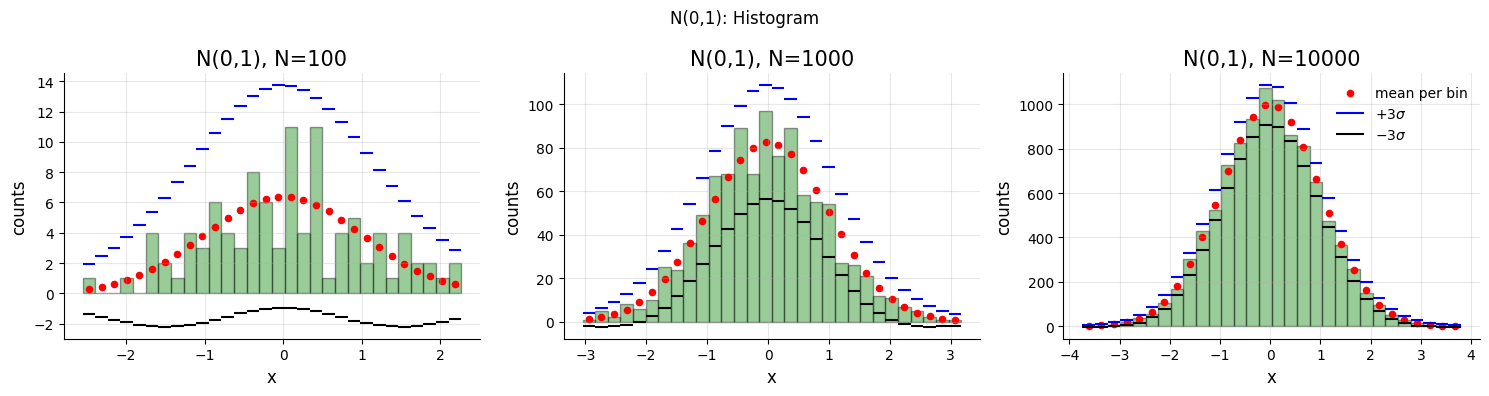

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(0) 
N = [100, 1000, 10000]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

mu, sigma = 0, 1 

for ax, n in zip(axes, N):
    x_norm = np.random.normal(mu, sigma, size=n)

    counts, bin_edges, _ = ax.hist(
        x_norm, bins=30, density=False,
        edgecolor='black', alpha=0.4, color="green"
    )
    
    p = norm.cdf(bin_edges[1:], loc=mu, scale=sigma) - norm.cdf(bin_edges[:-1], loc=mu, scale=sigma)

    mean_theory = n * p 
    sd_theory = np.sqrt(n * p * (1 - p)) 

    
    mean_emp = counts.mean()
    sd_emp = counts.std(ddof=0)

    bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    # ax.errorbar(
    #     bin_centres, 
    #     mean_theory, 
    #     yerr=3*sd_theory, 
    #     fmt='.',
    #     linestyle='', 
    #     capsize=3, 
    #     color="red", 
    #     ecolor='blue', 
    #     label=r"mean(red) and $\pm 3\sigma$ (blue lines)", 
    #     )
    
        # bin_centres: shape (n_bins,)
    # bin_edges:   shape (n_bins + 1,)
    # mean_theory, sd_theory: shape (n_bins,)

    
    ax.scatter(
        bin_centres,
        mean_theory,
        color='red',
        s=20,
        label='mean per bin'
    )

    
    ax.hlines(
        mean_theory + 3*sd_theory,   
        bin_edges[:-1],              
        bin_edges[1:],               
        colors='blue',
        label=r'$+3\sigma$'
    )

    ax.hlines(
        mean_theory - 3*sd_theory,
        bin_edges[:-1],
        bin_edges[1:],
        colors='black',
        label=r'$-3\sigma$'
    )

    print(f"bins length: {len(bins)}")
    print(f"bins = {bins}")
    print(f"N = {n}")
    print(f"  Empirical mean count per bin: {mean_emp:.3f}")
    print(f"  Mean of theoretical means:    {mean_theory.mean():.3f}")
    print(f"  Empirical sd of counts:       {sd_emp:.3f}")
    print(f"  RMS of theoretical sds:       {np.sqrt((sd_theory**2).mean()):.3f}")
    print()

    ax.set_title(f'N(0,1), N={n}')
    ax.set_xlabel('x')
    ax.set_ylabel('counts')

fig.suptitle('N(0,1): Histogram')
plt.tight_layout()
plt.legend()
plt.show()


##### Q2a: *Long report: Take $p(x) = U(x|0, 2π)$ and $f(x) = \sin{(x)}$ – this corresponds to measuring e.g. a carrier signal in a comms. system at a random phase offset. Determine the theoretical probability density for f(x) and verify once again by comparison with transformed random samples. Now, instead of the sin function, consider a limited sin function, an idealised version of the ‘clipping’ or limiting that can occur when electronics saturate: $f(x) = min(\sin{(x)}, 0.7)$ Determine experimentally from random samples what the output density is for y and comment on how this could be predicted from the Jacobian formula – pay particular attention to sin(x) > 0.7.*

$$p(y)=\sum_{k=1}^{K}{\frac{p(x)}{|d y/d x|}}{\bigg|}_{x=x_{k}(y)}$$

$$x_1​(y)=\sin^{-1}(y), x_2​(y)=π−\sin^{-1}(y)$$

$$\frac{dy}{dx} = \cos{\left(x\right)}$$

$$p(y) = \frac{1}{2\pi|\cos{\left(sin^{-1}(x)\right)}|} + \frac{1}{2\pi|\cos{\left(\pi - sin^{-1}(x)\right)}|} = \frac{1}{\pi|\cos{\left(sin^{-1}(x)\right)}|} = \frac{1}{\pi\sqrt{1 - sin^2{(\sin^{-1}{(y)})}}} = \frac{1}{\pi\sqrt{1-y^2}}$$

C:\Users\shsiv\AppData\Local\Temp\ipykernel_15540\249943720.py:8: RuntimeWarning: divide by zero encountered in divide
  return 1/(np.pi * np.sqrt(1-np.pow(x,2)))


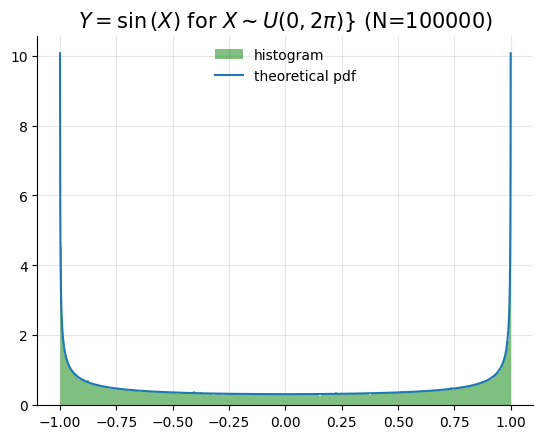

In [17]:
import numpy as np
import matplotlib.pyplot as plt

N = 100000         

def pdf(x):
    """Forms pdf. Takes in arr and returns arr"""
    return 1/(np.pi * np.sqrt(1-np.pow(x,2)))

x = np.random.uniform(0.0, 2.0 * np.pi, size=N)
y = np.sin(x)

plt.hist(y, bins=200, range=(-1, 1), density=True, color="green", alpha=0.5, label="histogram")
input = np.linspace(-1,1,4000)
plt.plot(input,pdf(input), label="theoretical pdf")
plt.legend()
plt.title(r"$Y=\sin{\left(X \right)}$ for $X \sim U(0,2\pi) $} (N=100000)")
plt.show()

$$
p_Y(y) = 
\begin{cases}
\dfrac{1}{\pi\sqrt{1-y^2}}, & -1 \le y < 0.7, \\[6pt]
\dfrac{1 - \arcsin(0.7)}{\pi}\,\delta(y - 0.7), & y = 0.7, \\[6pt]
0, & \text{otherwise},
\end{cases}
$$


$$
F_Y(y) =
\begin{cases}
\dfrac{1}{2} + \dfrac{\arcsin(y)}{\pi}, & -1 \le y \le 0.7, \\[6pt]
1, & y \ge 0.7, \\[6pt]
0, & y \lt 0.
\end{cases}
$$


C:\Users\shsiv\AppData\Local\Temp\ipykernel_17636\4088192396.py:8: RuntimeWarning: divide by zero encountered in divide
  return 1/(np.pi * np.sqrt([1- x**2 if x<0.7 else 0 for x in x]))


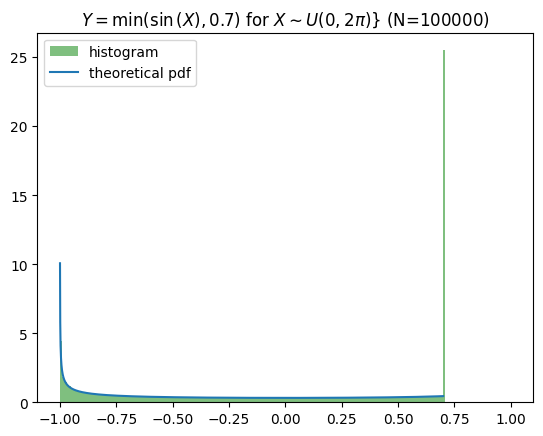

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 100000         

def pdf(x):
    """Forms pdf. Takes in arr and returns arr"""
    return 1/(np.pi * np.sqrt([1- x**2 if x<0.7 else 0 for x in x]))

x = np.random.uniform(0.0, 2.0 * np.pi, size=N)
y = [min(np.sin(x),0.7) for x in x]

plt.hist(y, bins=200, range=(-1, 1), density=True, color="green", alpha=0.5, label="histogram")
input = np.linspace(-1,1,4000)
plt.plot(input,pdf(input), label="theoretical pdf")
plt.legend()
plt.title(r"$Y=\min{(\sin{\left(X \right)},0.7)}$ for $X \sim U(0,2\pi) $} (N=100000)")
plt.show()

##### Q3: *Use your random samples to estimate the mean and variance of the exponential distribution, and verify that they are close to the expected theoretical values for this exponential distribution*

mean: 1.0220494130646556


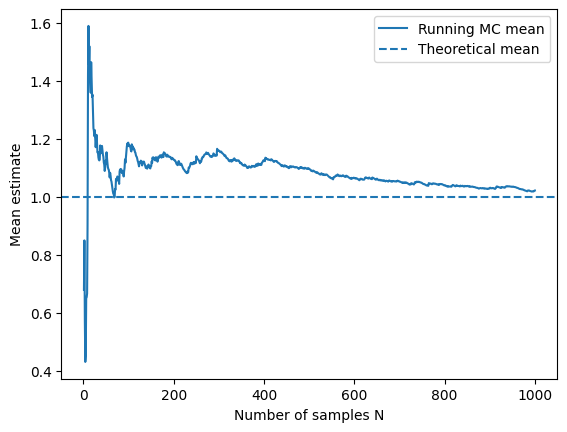

In [2]:
lam = 1.0          
N = 1000
mu_theo = 1 / lam

rng = np.random.default_rng(seed=0)
samples = rng.exponential(scale=1/lam, size=N)
running_mean = np.cumsum(samples) / np.arange(1, N+1)
x = np.arange(1, N+1)
print(f"mean: {running_mean[-1]}")
plt.plot(x, running_mean, label="Running MC mean")
plt.axhline(mu_theo, linestyle="--", label="Theoretical mean")
plt.xlabel("Number of samples N")
plt.ylabel("Mean estimate")
plt.legend()
plt.show()


In [4]:
lam = 1.0          
N = 1000
var_theo = 1 / lam**2
rng = np.random.default_rng(seed=0)
samples = rng.exponential(scale=1/lam, size=N)
print(np.var(samples, ddof=1))

1.004399748784571


##### *Show that the Monte Carlo mean estimate $\hat{\mu}$ is unbiased, i.e. that $\mathbb{E}[\hat{\mu}] = \mu$, where the first expectation is taken wrt the distribution of the randomsamples $y^{(i)}$, i.e. $p(y)$*

$$\hat{\mu} = \frac{1}{N}\sum_{i=1}^{N}y^{(i)}$$
$$\mathbb{E}[\hat{\mu}] = \mathbb{E}[\frac{1}{N}\sum_{i=1}^{N}y^{(i)}] = \frac{1}{N}\sum_{i=1}^{N}\mathbb{E}[y^{(i)}] = \frac{1}{N}\sum_{i=1}^{N}\mu = \frac{1}{N}N\mu = \mu$$

So Mone Carlo mean estimate is unbiased.

#### *Show from expectation formulae that the Monte Carlo mean estimator has variance equal to $\frac{\sigma^{2}}{N}$ , i.e. that*

$$
\begin{aligned}
\mathbb{E}[\hat{\mu}^2]
&= \mathbb{E}\left[\left(\frac{1}{N}\sum_{i=1}^N y^{(i)}\right)^2\right] \\
&= \frac{1}{N^2}\,
   \mathbb{E}\left[\sum_{i=1}^N \sum_{j=1}^N y^{(i)} y^{(j)}\right].
\end{aligned}
$$

For the double sum there are two cases:

1. **Case \(i = j\)**  

   $$
   \mathbb{E}\big[y^{(i)} y^{(i)}\big] = \mu^2 + \sigma^2,
   $$

and there are \(N\) such terms.

2. **Case \(i != j\)**  

   $$
   \mathbb{E}\big[y^{(i)} y^{(j)}\big]
   = \mathbb{E}[y^{(i)}]\mathbb{E}[y^{(j)}] 
   = \mu^2,
   $$
This is because they are iid so can seperate into two expectations. There are $N^{2} - N = N(N-1)$ such terms.

Putting it together:

$$
\begin{aligned}
\mathbb{E}[\hat{\mu}^2]
&= \frac{1}{N^2}
\left( N(\mu^2 + \sigma^2) + N(N-1)\mu^2 \right) \\
&= \frac{1}{N^2}\left( N\sigma^2 + N^2\mu^2 \right) \\
&= \frac{\sigma^2}{N} + \mu^2.
\end{aligned}
$$

$$
\begin{aligned}
\mathbb{E}[\hat{\mu}^2 - \mu^2]
&= \frac{1}{N^2}
\left( N(\mu^2 + \sigma^2) + N(N-1)\mu^2 \right) - \mu^2 \\
&= \frac{1}{N^2}\left( N\sigma^2 + N^2\mu^2 \right) - \mu^2\\
&= \frac{\sigma^2}{N} + \mu^2 - \mu^2 \\
&= \frac{\sigma^2}{N} \\
& \propto \frac{1}{N}
\end{aligned}
$$



<>:25: SyntaxWarning: invalid escape sequence '\h'
<>:25: SyntaxWarning: invalid escape sequence '\h'
C:\Users\shsiv\AppData\Local\Temp\ipykernel_1508\3759112051.py:25: SyntaxWarning: invalid escape sequence '\h'
  plt.loglog(N_vals, sq_error, label="Squared error $(\hat{\\mu} - \\mu)^2$")


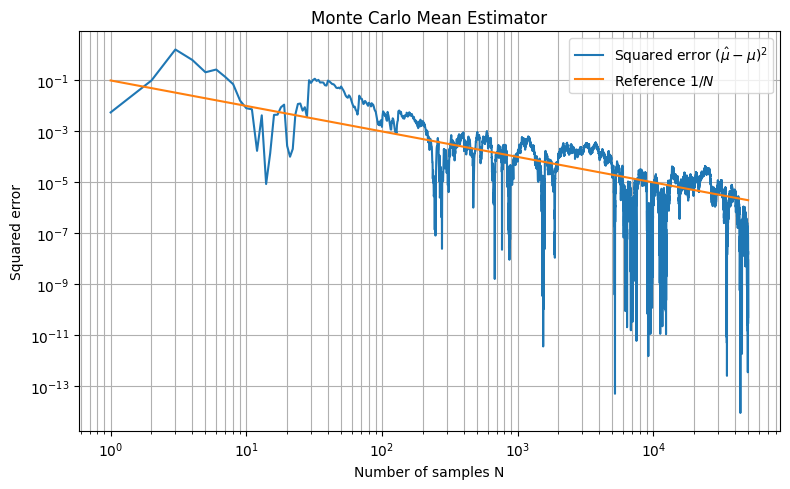

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N_max = 50000
lam = 1.0
mu_true = 1.0 / lam  
rng = np.random.default_rng(1)


samples = rng.exponential(scale=1.0/lam, size=N_max)

# Running mean
N_vals = np.arange(1, N_max + 1)
running_mean = np.cumsum(samples) / N_vals

# Squared error
sq_error = (running_mean - mu_true) ** 2

# Reference 1/N curve (scaled)
ref_curve = sq_error[1] * (1 / N_vals)

# Plot
plt.figure(figsize=(8, 5))
plt.loglog(N_vals, sq_error, label="Squared error $(\hat{\\mu} - \\mu)^2$")
plt.loglog(N_vals, ref_curve, label="Reference $1/N$")
plt.xlabel("Number of samples N")
plt.ylabel("Squared error")
plt.title("Monte Carlo Mean Estimator")
plt.legend()
plt.grid(True, which="both")
plt.tight_layout()
plt.show()


#### *With β = 0, use your random numbers to estimate the tail probability for the distribution, i.e. the probability that |X| > t, where t = 0, 3, 6, and for the two cases α = 0.5 and α = 1.5.*

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable, norm

N = 1000000
alphas = [0.5,1.5]
beta = 0.0

for alpha in alphas:
    print(f"alpha{alpha}")
    print("-----")
    rng = np.random.default_rng(0)
    samples = levy_stable.rvs(alpha, beta, size=N, random_state=rng)
    for t in [0,3,6]:
        print(f"t={t}:{np.mean(np.abs(samples) > t)}")
    print("    ")
        

alpha0.5
-----
t=0:1.0
t=3:0.367382
t=6:0.27758
    
alpha1.5
-----
t=0:1.0
t=3:0.103147
t=6:0.030596
    


alpha=0.5:  gamma_hat ≈ -1.630,  gamma_theory = -1.500
alpha=1.5:  gamma_hat ≈ -1.669,  gamma_theory = -2.500


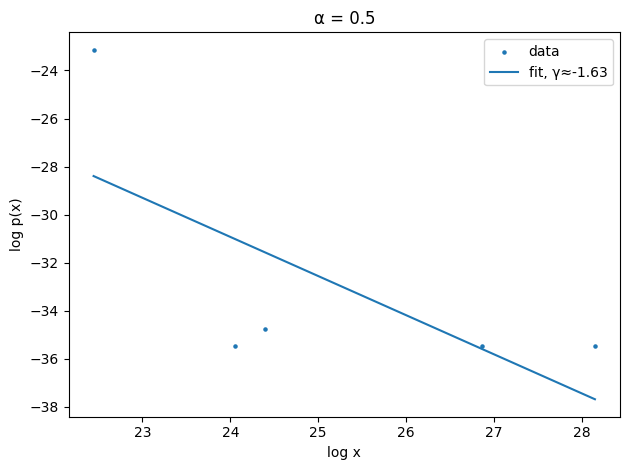

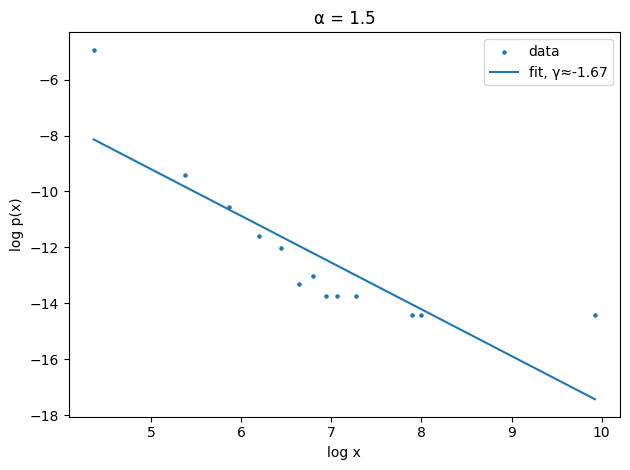

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable

N = 1000000
alphas = [0.5, 1.5]
beta = 0.0

# Generate dist
for alpha in alphas:
    print(f"alpha{alpha}")
    print("-----")
    rng = np.random.default_rng(0)
    samples = levy_stable.rvs(alpha, beta, size=N, random_state=rng)
    plt.title(f"alpha = {alpha}")
    # caluclate p(x)'s for evey x to plot
    x = np.linspace(5,100,1000)

    #plot logpx against x to find gamma (grad)
    


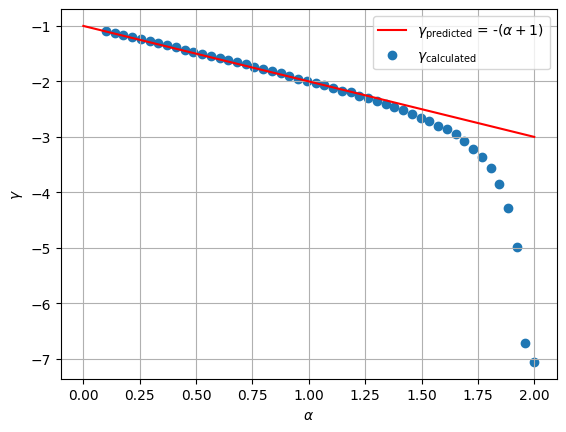

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable

N = 1000000
alphas = [0.25,0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]
alphas = np.linspace(0.1,2,50)
beta = 0.0
y = []

rng = np.random.default_rng(0)

for alpha in alphas:

    samples = levy_stable.rvs(alpha, beta, size=N, random_state=rng)
    x = np.abs(samples)

    # bunch of removing outier stuff
    x_min_hist = 1.0
    x_max_hist = np.quantile(x, 0.999) 
    #still need bins for this
    n_bins = 100
    bin_edges = np.logspace(np.log10(x_min_hist), np.log10(x_max_hist), n_bins + 1)
    counts, edges = np.histogram(x, bins=bin_edges, density=False)
    widths = np.diff(edges)
    centers = 0.5 * (edges[:-1] + edges[1:])

    #remove noise
    pdf = counts / (N * widths)
    x_min_tail = 3.0
    min_count = 10

    mask = (centers >= x_min_tail) & (counts >= min_count) & (pdf > 0)

    x_tail = centers[mask]
    p_tail = pdf[mask]

    logx = np.log(x_tail)
    logp = np.log(p_tail)

    # logp = gamma*logx + logc
    gamma, log_c = np.polyfit(logx, logp, 1)
    y.append(gamma)
    # print(f"alpha = {alpha}")
    # print(f"estimated gamma: {gamma:.3f}")
    # print(f"theoretical gamma: {-(alpha+1):.3f}")


plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\gamma$")
plt.grid()
plt.plot([0,2],[-1,-3],label=r"$\gamma_{\text{predicted}}$ = -$(\alpha+1)$",color="red")
plt.scatter(alphas,y, label=r"$\gamma_{\text{calculated}}$")
plt.legend()
plt.show()

alpha = 0.5
estimated gamma:   -1.477
theoretical gamma: -1.500
alpha = 1.5
estimated gamma:   -2.678
theoretical gamma: -2.500


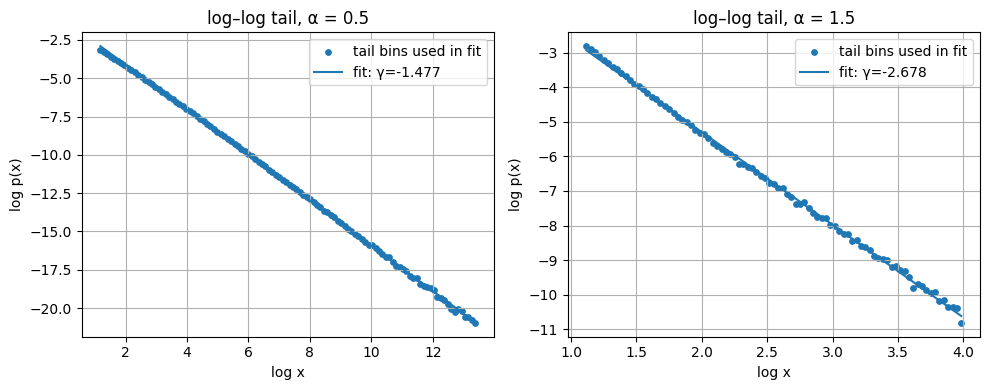

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable

N = 1_000_000
alphas = [0.5, 1.5]
beta = 0.0

rng = np.random.default_rng(0)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for i, alpha in enumerate(alphas):
    ax = axes[i]

    samples = levy_stable.rvs(alpha, beta, size=N, random_state=rng)
    x = np.abs(samples)

    x_min_hist = 1.0
    x_max_hist = np.quantile(x, 0.999)

    n_bins = 120
    bin_edges = np.logspace(np.log10(x_min_hist), np.log10(x_max_hist), n_bins + 1)

    counts, edges = np.histogram(x, bins=bin_edges, density=False)
    widths = np.diff(edges)
    centers = 0.5 * (edges[:-1] + edges[1:])

    pdf = counts / (N * widths)

    x_min_tail = 3.0
    min_count = 10

    mask = (centers >= x_min_tail) & (counts >= min_count) & (pdf > 0)
    x_tail = centers[mask]
    p_tail = pdf[mask]

    logx = np.log(x_tail)
    logp = np.log(p_tail)

    gamma, log_c = np.polyfit(logx, logp, 1)

    print(f"alpha = {alpha}")
    print(f"estimated gamma:   {gamma:.3f}")
    print(f"theoretical gamma: {-(alpha+1):.3f}")

    # plot on the current axes
    ax.scatter(logx, logp, s=15, label='tail bins used in fit')
    ax.plot(logx, gamma * logx + log_c, label=f'fit: γ={gamma:.3f}')
    ax.set_xlabel("log x")
    ax.set_ylabel("log p(x)")
    ax.set_title(f"log–log tail, α = {alpha}")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.savefig("stable_tails.png", dpi=300)  
plt.show()
